# Session 1

1. Python and Jupyter Notebooks
2. Get the data + what is Pandas
3. Let"s clean the data 
4. Add molecular information + RDKit
5. Data exploration

In [616]:
import pandas as pd
import math
from rdkit import Chem
from rdkit.Chem import Descriptors, PandasTools, rdMolDescriptors
import matplotlib.pyplot as plt
import seaborn as sns

## Python and Jupyter Notebooks

A **Jupyter notebook** combines executable code, equations, visualizations, and explanatory text into a single interactive document. It is organized into *cells*, which can be of two main types:
* Rich-text or Markdown cells (like this cell)
* Code cells

You can run (execute) each cell individually by pressing `Shift+Enter` or `Ctrl+Enter`. Once a cell has been executed, all variables, functions, and other definitions remain available to both earlier and later cells in the notebook. Thus, you need to be careful with the order in which you execute your cells!

**Python** is a widely used general-purpose high-level programming language. The term "high-level" means that the language has abstracted away most of the technical details and manages them for you (e.g. memory allocation).

In this course we will use Python xxx (default in Colab as of xxx).

Python programs are built from a few basic elements:
* Variables (e.g., `x`, `y`) – store data
* Objects (e.g., `0`, `True`, `"abc"`) – numbers, boolean, text, lists, etc.
* Operators (e.g., `+`, `==`, `=`) – perform calculations, comparisons, or assignments
* Control flow – if, for, while for logic and loops
* Functions – reusable blocks of code
* Modules – libraries that extend functionality

**Variable, objects, and operators:**

In [673]:
# assignments
x = 1
y = 3

# multiply and assign
z = x * y

print(f"x + y = {z}")

# boolean
b = True
print(f"{b=}")

# strings
x_str = "hello"
y_str = "world"

# plus-operaot on strings
s = x_str + " " + y_str

print(s)

x + y = 3
b=True
hello world


**Lists:**

In [669]:
# create a list
activities = [47, 150.4, 9.2, 42.5]

# access a list (zero-indexed)
first_element = activities[0]
last_element = activities[-1]
activities[2] = 95.3

print(f"{first_element=}, {last_element=}")

# append element to list
activities.append(107.3)

print(f"{activities=}")

first_element=47, last_element=42.5
activities=[47, 150.4, 95.3, 42.5, 107.3]


**Controll flows (for-loops and if-then-else):**

In [ ]:
# iterate over list with a for-loop
sum = 0
for n in activities:
    sum += n # short form for (sum = sum + n)
    
# devide it by the number of activity values (length of list)
mean_activity = sum / len(activities)

print(f"The mean of {activities} is {mean_activity}nM")

# conditional execution: if-then-else 
if mean_activity < 100:
    print(f"Mean activity is below 100nM")
else:
    print(f"Mean activity >= 100nM")

The mean of [47, 150.4, 95.3, 42.5, 107.3] is 88.5nM
Mean activity is below 100nM


**Functions:**

In [ ]:
# define a function
def IC50_to_pIC50(IC50_value: float) -> float:
    # pIC50 = - log_10(IC50)
    logIC50 = math.log10(IC50_value)
    return -logIC50

In [ ]:
# execute a function
mean_activity_pIC50 = IC50_to_pIC50(mean_activity)

print(f"IC50 = {mean_activity}nM; pIC50 = {mean_activity_pIC50:.3f}nM")

IC50 = 71.28nM; pIC50 = -1.853nM


## Get the data + what is Pandas
We will work with acticity data of EGFR. Pandas helps to work with datasets. Lets first read data froma CSV file.

# TODO show how to get info for what we can do with df -> member functions 

In [ ]:
egfr_df = pd.read_csv("../data/EGFR-activities-chembl33.csv")
egfr_df.head()

,Unnamed: 0.1,Unnamed: 0,activities.activity_id,assays.chembl_id,target_dictionary.chembl_id,molecule_dictionary.chembl_id,molecule_dictionary.max_phase,activities.standard_type,activities.standard_value,activities.standard_units,compound_structures.canonical_smiles,compound_structures.standard_inchi,component_sequences.sequence,assays.confidence_score,docs.chembl_id,docs.year,docs.authors,UniprotID
0,57,7654,1044894,CHEMBL683040,CHEMBL203,CHEMBL63786,NaN,pIC50,11.522879,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,InChI=1S/C18H12BrN3/c19-14-6-3-7-15(10-14)22-1...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,9,CHEMBL1129035,1996.0,"Rewcastle GW, Palmer BD, Bridges AJ, Showalter...",P00533
1,107,1064,191437,CHEMBL677389,CHEMBL203,CHEMBL35820,NaN,pIC50,11.221849,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,InChI=1S/C18H18BrN3O2/c1-3-23-16-9-14-15(10-17...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1130030,1997.0,"Palmer BD, Trumpp-Kallmeyer S, Fry DW, Nelson ...",P00533
2,108,7949,1082447,CHEMBL680021,CHEMBL203,CHEMBL53711,NaN,pIC50,11.221849,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,InChI=1S/C15H14BrN5/c1-21(2)14-7-12-13(8-17-14...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1129564,1996.0,"Rewcastle GW, Palmer BD, Thompson AM, Bridges ...",P00533
3,150,2936,428391,CHEMBL679944,CHEMBL203,CHEMBL66031,NaN,pIC50,11.096910,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,InChI=1S/C15H10BrN5/c16-9-2-1-3-10(4-9)21-15-1...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1132555,1999.0,"Showalter HD, Bridges AJ, Zhou H, Sercel AD, M...",P00533
4,151,2647,400160,CHEMBL679944,CHEMBL203,CHEMBL53753,NaN,pIC50,11.096910,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,InChI=1S/C14H12BrN5/c1-16-13-6-11-12(7-17-13)1...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1132555,1999.0,"Showalter HD, Bridges AJ, Zhou H, Sercel AD, M...",P00533


In [ ]:
egfr_df.shape

(7287, 18)

In [ ]:
print(egfr_df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'activities.activity_id',
       'assays.chembl_id', 'target_dictionary.chembl_id',
       'molecule_dictionary.chembl_id', 'molecule_dictionary.max_phase',
       'activities.standard_type', 'activities.standard_value',
       'activities.standard_units', 'compound_structures.canonical_smiles',
       'compound_structures.standard_inchi', 'component_sequences.sequence',
       'assays.confidence_score', 'docs.chembl_id', 'docs.year',
       'docs.authors', 'UniprotID'],
      dtype='object')


We can access columns by their name and rows by the index:

In [ ]:
egfr_df["molecule_dictionary.chembl_id"][123]

'CHEMBL3357635'

We can also drop colums we are not interested in:

TODO mention that new df is generated, maybe introduce inplace

In [ ]:
egfr_df = egfr_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
egfr_df.head()

,activities.activity_id,assays.chembl_id,target_dictionary.chembl_id,molecule_dictionary.chembl_id,molecule_dictionary.max_phase,activities.standard_type,activities.standard_value,activities.standard_units,compound_structures.canonical_smiles,compound_structures.standard_inchi,component_sequences.sequence,assays.confidence_score,docs.chembl_id,docs.year,docs.authors,UniprotID
0,1044894,CHEMBL683040,CHEMBL203,CHEMBL63786,NaN,pIC50,11.522879,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,InChI=1S/C18H12BrN3/c19-14-6-3-7-15(10-14)22-1...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,9,CHEMBL1129035,1996.0,"Rewcastle GW, Palmer BD, Bridges AJ, Showalter...",P00533
1,191437,CHEMBL677389,CHEMBL203,CHEMBL35820,NaN,pIC50,11.221849,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,InChI=1S/C18H18BrN3O2/c1-3-23-16-9-14-15(10-17...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1130030,1997.0,"Palmer BD, Trumpp-Kallmeyer S, Fry DW, Nelson ...",P00533
2,1082447,CHEMBL680021,CHEMBL203,CHEMBL53711,NaN,pIC50,11.221849,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,InChI=1S/C15H14BrN5/c1-21(2)14-7-12-13(8-17-14...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1129564,1996.0,"Rewcastle GW, Palmer BD, Thompson AM, Bridges ...",P00533
3,428391,CHEMBL679944,CHEMBL203,CHEMBL66031,NaN,pIC50,11.096910,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,InChI=1S/C15H10BrN5/c16-9-2-1-3-10(4-9)21-15-1...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1132555,1999.0,"Showalter HD, Bridges AJ, Zhou H, Sercel AD, M...",P00533
4,400160,CHEMBL679944,CHEMBL203,CHEMBL53753,NaN,pIC50,11.096910,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,InChI=1S/C14H12BrN5/c1-16-13-6-11-12(7-17-13)1...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,8,CHEMBL1132555,1999.0,"Showalter HD, Bridges AJ, Zhou H, Sercel AD, M...",P00533


Or select those columns, we want to consider:

In [ ]:
egfr_activities = egfr_df[["molecule_dictionary.chembl_id", "activities.standard_type", 
                          "activities.standard_value", "activities.standard_units", 
                          "compound_structures.canonical_smiles"]]
egfr_activities.head()

,molecule_dictionary.chembl_id,activities.standard_type,activities.standard_value,activities.standard_units,compound_structures.canonical_smiles
0,CHEMBL63786,pIC50,11.522879,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1
1,CHEMBL35820,pIC50,11.221849,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC
2,CHEMBL53711,pIC50,11.221849,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1
3,CHEMBL66031,pIC50,11.096910,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1
4,CHEMBL53753,pIC50,11.096910,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1


In [ ]:
egfr_activities.shape

(7287, 5)

Lets rename some of the columns:

In [ ]:
egfr_activities = egfr_activities.rename(columns={"activities.standard_type": "standard_type", 
                                "activities.standard_value": "standard_value", "activities.standard_units" : "standard_units",
                                "compound_structures.canonical_smiles": "canonical_smiles"
                                })
egfr_activities

,molecule_dictionary.chembl_id,standard_type,standard_value,standard_units,canonical_smiles
0,CHEMBL63786,pIC50,11.522879,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1
1,CHEMBL35820,pIC50,11.221849,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC
2,CHEMBL53711,pIC50,11.221849,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1
3,CHEMBL66031,pIC50,11.096910,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1
4,CHEMBL53753,pIC50,11.096910,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1
...,...,...,...,...,...
7282,CHEMBL75718,pIC50,2.619789,nM,N#C/C=C/c1ccc(O)cc1
7283,CHEMBL261238,pIC50,2.301030,nM,CN(c1cccnc1)c1cc2c(Nc3ccc(F)c(Cl)c3)c(C#N)cnc2cn1
7284,CHEMBL76587,pIC50,2.187087,nM,N#CC(C#N)Cc1ccc(O)cc1
7285,CHEMBL490510,pIC50,1.721246,nM,O=C(/C=C/c1ccc(O)c(O)c1)c1ccc(O[C@@H]2O[C@H](C...


In [ ]:
egfr_activities.dtypes

molecule_dictionary.chembl_id     object
standard_type                     object
standard_value                   float64
standard_units                    object
canonical_smiles                  object
dtype: object

## Lets clean the data
1. Missing values
2. Standard values
3. Duplicates

### Missing values

In [ ]:
print(f"Entries with missing smiles: {egfr_activities['canonical_smiles'].isna().sum()}")

Entries with missing smiles: 7


As these are only very few samples, we will simply remove the ones with missing SMILES.

In [ ]:
egfr_activities = egfr_activities.dropna(subset="canonical_smiles")
egfr_activities.shape

(7280, 5)

In [ ]:
print(f"Entries with missing standard value: {egfr_activities['standard_value'].isna().sum()}")

Entries with missing standard value: 0


### Standard value

In [ ]:
egfr_activities["standard_type"].value_counts()

standard_type
pIC50    6896
pKi       254
pKd       130
Name: count, dtype: int64

The standard values have different types. Without convertion - for which we need more information (i.e. substrate concentration and Michaelis constant; see Cheng-Cruchoff) - they are not really comparable. Thus, we will here only consider the pIC50.

In [ ]:
egfr_activities = egfr_activities[egfr_activities["standard_type"] == "pIC50"]
egfr_activities.shape

(6896, 5)

We can drop the standard_type and rename the standard_value column:

In [ ]:
egfr_activities = egfr_activities.rename(columns={"standard_value": "pIC50"})
egfr_activities =  egfr_activities.drop(columns=["standard_type"])
egfr_activities.head()

,molecule_dictionary.chembl_id,pIC50,standard_units,canonical_smiles
0,CHEMBL63786,11.522879,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1
1,CHEMBL35820,11.221849,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC
2,CHEMBL53711,11.221849,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1
3,CHEMBL66031,11.096910,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1
4,CHEMBL53753,11.096910,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1


Let"s also check whether all have the same unit:

In [ ]:
print(f"Unique units: {egfr_activities['standard_units'].unique()}")

Unique units: ['nM']


### Duplicates

In [ ]:
print(f"Number of duplicates: {egfr_activities['molecule_dictionary.chembl_id'].duplicated().sum()}")

Number of duplicates: 198


There are different approaches, how to deal with duplicates, e.g. simply drop them, use the mean value, ....

Here, we will use the mean pIC50 for duplicates:

In [ ]:
egfr_activities_deduplicated = egfr_activities.groupby("molecule_dictionary.chembl_id", as_index=False).agg(
    {"molecule_dictionary.chembl_id": "first",
        "canonical_smiles": "first", "pIC50": "mean",
        "standard_units": "first"
        })
egfr_activities_deduplicated.head()

,molecule_dictionary.chembl_id,canonical_smiles,pIC50,standard_units
0,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,6.339419,nM
1,CHEMBL1016,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,5.484537,nM
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,5.136677,nM
3,CHEMBL102726,c1ccc(CNc2ncnc3ccccc23)cc1,6.494850,nM
4,CHEMBL103552,O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O,5.387216,nM


# TODO check (for us) no dupl. smiles

## Add molecular information + RDKit
RDKit is a powerfull library to handle molecules, we will use this to calculate different molecular properies of our EGFR ligand. 

### RDKit Intro

In RDKit, we can generate RDKit molecule instances from their SMILES:

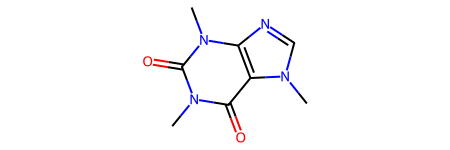

In [639]:
smiles_caffeine = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
caffeine = Chem.MolFromSmiles(smiles_caffeine)
caffeine

We can also caluclate different physiochemical properties of the molcule:

In [640]:
print(f"MolWt: {Descriptors.MolWt(caffeine)}")
print(f"logP: {Descriptors.MolLogP(caffeine)}")
print(f"Num HBA: {rdMolDescriptors.CalcNumHBA(caffeine)}")
print(f"Num HBD: {rdMolDescriptors.CalcNumHBD(caffeine)}")

MolWt: 194.194
logP: -1.0293
Num HBA: 6
Num HBD: 0


### Molecular propeties to EGFR data

In [ ]:
PandasTools.AddMoleculeColumnToFrame(egfr_activities_deduplicated, "canonical_smiles")
egfr_activities_deduplicated.head()

,molecule_dictionary.chembl_id,canonical_smiles,pIC50,standard_units,ROMol
0,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,6.339419,nM,<rdkit.Chem.rdchem.Mol object at 0x1951fba00>
1,CHEMBL1016,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,5.484537,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b80b0>
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,5.136677,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b8120>
3,CHEMBL102726,c1ccc(CNc2ncnc3ccccc23)cc1,6.494850,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b8200>
4,CHEMBL103552,O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O,5.387216,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b8270>


In [ ]:
egfr_activities_deduplicated["mol_weight"] = egfr_activities_deduplicated["ROMol"].apply(Descriptors.MolWt)
egfr_activities_deduplicated.head()

,molecule_dictionary.chembl_id,canonical_smiles,pIC50,standard_units,ROMol,mol_weight
0,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,6.339419,nM,<rdkit.Chem.rdchem.Mol object at 0x1951fba00>,346.821
1,CHEMBL1016,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,5.484537,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b80b0>,440.463
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,5.136677,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b8120>,337.810
3,CHEMBL102726,c1ccc(CNc2ncnc3ccccc23)cc1,6.494850,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b8200>,235.290
4,CHEMBL103552,O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O,5.387216,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b8270>,381.384


In [ ]:
egfr_activities_deduplicated["logP"] = egfr_activities_deduplicated["ROMol"].apply(Descriptors.MolLogP)
egfr_activities_deduplicated.head()

,molecule_dictionary.chembl_id,canonical_smiles,pIC50,standard_units,ROMol,mol_weight,logP
0,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,6.339419,nM,<rdkit.Chem.rdchem.Mol object at 0x1951fba00>,346.821,5.0126
1,CHEMBL1016,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,5.484537,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b80b0>,440.463,4.0286
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,5.136677,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b8120>,337.810,4.5994
3,CHEMBL102726,c1ccc(CNc2ncnc3ccccc23)cc1,6.494850,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b8200>,235.290,3.2419
4,CHEMBL103552,O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O,5.387216,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b8270>,381.384,3.4140


Let's safe the prepared dataset in a CSV file:

In [ ]:
egfr_activities_deduplicated.to_csv("../data/EGFR-activities-chembl33-prepared.csv")

## Data exploration and visualization

In [ ]:
egfr_activities_deduplicated.describe()

,pIC50,mol_weight,logP
count,6698.000000,6698.000000,6698.000000
mean,6.876000,456.787818,4.449014
std,1.443117,114.490567,1.410899
min,1.602060,110.112000,-10.326100
25%,5.795880,377.245000,3.590700
50%,6.967988,456.143000,4.422390
75%,8.000000,529.645000,5.299345
max,11.522879,2296.971000,13.028900


Let's plot the distribution of pIC50 values:

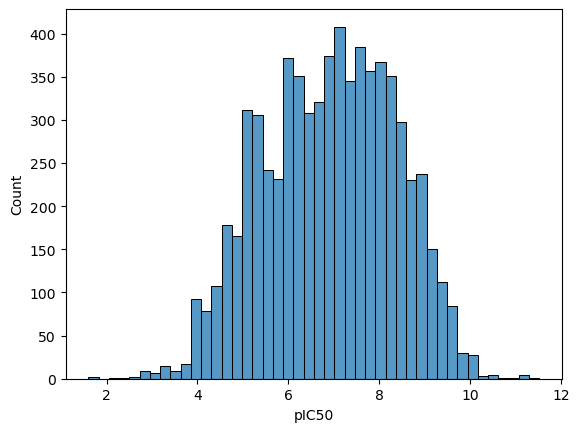

In [ ]:
sns.histplot(egfr_activities["pIC50"])
plt.show()

What do we see here?

Let's also inspect, how our moleules look like in terms of molecular properties:

<Axes: >

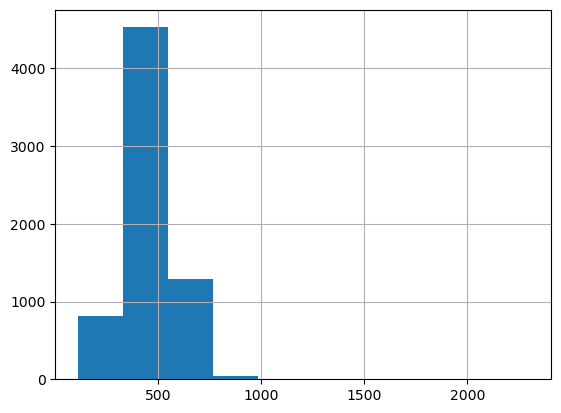

In [ ]:
egfr_activities_deduplicated["mol_weight"].hist()

In [ ]:
num_small_molecules = (egfr_activities_deduplicated['mol_weight'] <= 500).sum()
percent_small_molecules = 100 * num_small_molecules / len(egfr_activities_deduplicated)
print(f"Molecules with molecular weight <= 500 Da: {num_small_molecules} ({percent_small_molecules:.1f}%)")

Molecules with molecular weight <= 500 Da: 4397 (65.6%)


We can also look at pairwise relationships of all variables:

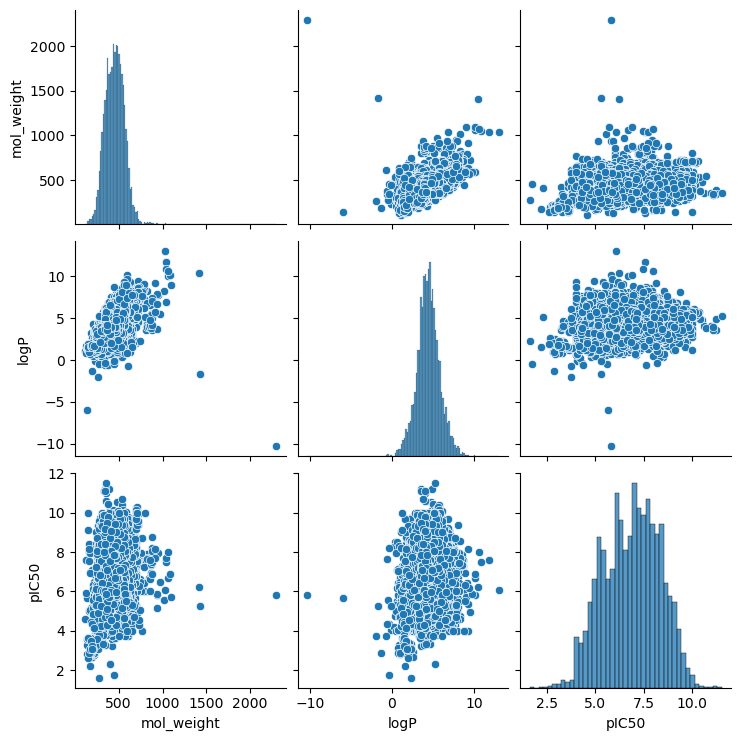

In [ ]:
sns.pairplot(egfr_activities_deduplicated[["mol_weight", "logP", "pIC50"]])
plt.show()

# Fingerprints ? e.g. morgan

In [ ]:
from rdkit.Chem import AllChem
fpgen = AllChem.GetMorganGenerator(radius=2, fpSize=1024) # default radius 3

egfr_activities_deduplicated['morgan_fp'] = egfr_activities_deduplicated['ROMol'].apply(fpgen.GetFingerprint)
egfr_activities_deduplicated['morgan_fp'] = egfr_activities_deduplicated['morgan_fp'].apply(list)
egfr_activities_deduplicated.head()

,molecule_dictionary.chembl_id,canonical_smiles,pIC50,standard_units,ROMol,mol_weight,logP,morgan_fp
0,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,6.339419,nM,<rdkit.Chem.rdchem.Mol object at 0x1951fba00>,346.821,5.0126,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL1016,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,5.484537,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b80b0>,440.463,4.0286,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,5.136677,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b8120>,337.810,4.5994,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL102726,c1ccc(CNc2ncnc3ccccc23)cc1,6.494850,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b8200>,235.290,3.2419,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CHEMBL103552,O=C(O)c1cc(N(Cc2ccccc2O)Cc2cc(O)ccc2O)ccc1O,5.387216,nM,<rdkit.Chem.rdchem.Mol object at 0x1953b8270>,381.384,3.4140,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
egfr_activities_deduplicated.to_csv("../data/EGFR-activities-prepared.csv", columns=['pIC50', 
                                                                                     'standard_units', 
                                                                                     'molecule_dictionary.chembl_id', 
                                                                                     'canonical_smiles'])

# Tanimoto similarity between 2

## Exercises

### Exercise 1

In [652]:
# Complete the function that converts the pIC50 to IC50
def pIC50_to_IC50(pIC50_value: float) -> float:
    # TODO
    return None

In [653]:
# Use the function to add a IC50 column to the deduplicated egfr dataframe

# TODO

In [654]:
# Plot the distributions of IC50 values

# TODO

# Would you prefer IC50 or pIC50 values for visualization? Why?

### Exercise 2

In [655]:
# Add the following molecular property descriptors to the deduplicated egfr dataframe: number of HBD, HBA, RB

# TODO

In [656]:
# Complete this function that determines how many of the four Ro5 are fulfilles:

def num_ro5(mol_weight, num_HBA, num_HBD, logP) -> int:
    # TODO
    return None

In [657]:
# Add a column to the dataframe that states how many Ro5 rules are fulfilled

# TODO

In [658]:
# Determine how many ligands fulfill all four Ro5

# TODO

# TODO Expert exercise

E.g. given molecule -> calc tanimoto similarity, sort, determine x most similar onces